In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [26]:
# Load the dataset
data = pd.read_csv('/content/Life Expectancy Data.csv')

# Display first few rows
print(data.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [35]:

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns # Changed df to data
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean()) # Changed df to data

categorical_cols = data.select_dtypes(include=['object']).columns # Changed df to data
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0]) # Changed df to data

if 'Status' in data.columns:
    le = LabelEncoder()
    data['Status'] = le.fit_transform(data['Status'])  # Developed -> 1, Developing -> 0 # Changed df to data

if 'Country' in data.columns:
    data = data.drop('Country', axis=1)


X = data.drop('Life expectancy ', axis=1)  # Note: sometimes there's an extra space! # Changed df to data
y = data['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:

X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']


In [7]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42     # random seed to make results reproducible
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (2350, 20)
Test set size: (588, 20)


In [9]:
from sklearn.linear_model import LinearRegression



In [10]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Predict on test data
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import r2_score, mean_squared_error

# R² Score (closer to 1 is better)
r2 = r2_score(y_test, y_pred)

# Mean Squared Error (lower is better)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.82
Mean Squared Error: 15.24


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [14]:
y_pred = model.predict(X_test)


In [15]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2.86
Mean Squared Error (MSE): 15.24
R² Score: 0.82


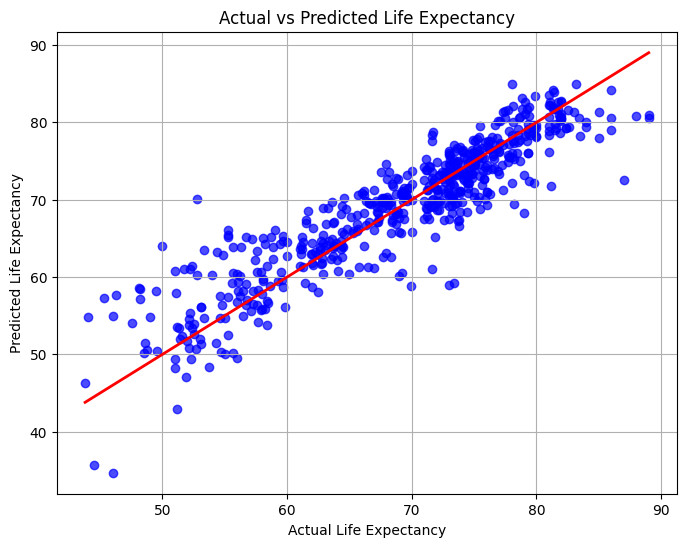

In [16]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.grid(True)
plt.show()


In [20]:
data.duplicated().values.any()

np.False_

In [21]:
data.isnull().values.any()

np.False_

In [22]:
data.dropna(inplace=True)

In [28]:
data = data[data['Country'] == 'India']
X = data.iloc[:,-1].values.reshape(-1,1)
Y = data.iloc[:,3].values

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [30]:
Reg = LinearRegression()
Reg.fit(X_train,Y_train)

LinearRegression()

In [31]:
Reg.predict([[13]])

array([70.10992353])

Text(0.5, 1.0, 'Schooling and life expectancy in india')

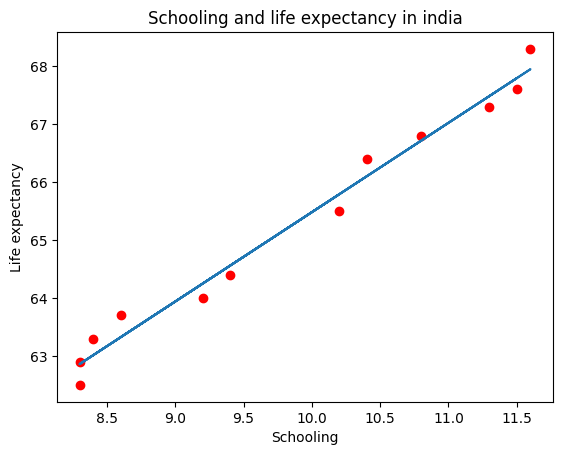

In [32]:
plt.scatter(X_train,Y_train, color='red')
plt.plot(X_train,Reg.predict(X_train))
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.title('Schooling and life expectancy in india')

Text(0.5, 1.0, 'Schooling and life expectancy in india')

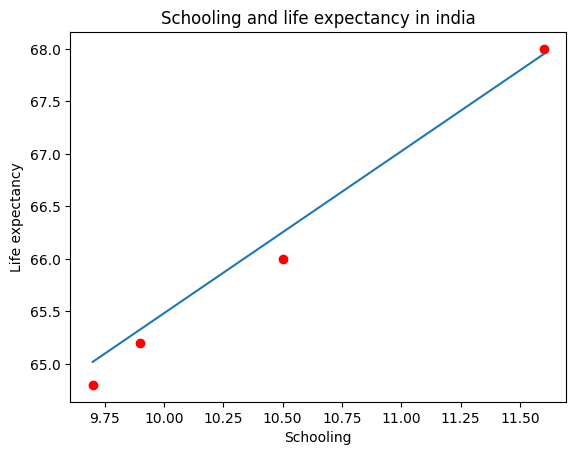

In [33]:
plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test,Reg.predict(X_test))
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.title('Schooling and life expectancy in india')